In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DATA

**Context**

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to **diagnostically predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988).** Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).** IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [ ]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

* **Pregnancies** : No. of Pregnancies the person been through

* **Glucose** (or) Blood Sugar Level: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

* **BloodPressure** : Diastolic blood pressure (mm Hg).
A normal blood pressure level is less than 120/80 mmHg. No matter your age, you can take steps each day to keep your blood pressure in a healthy range.

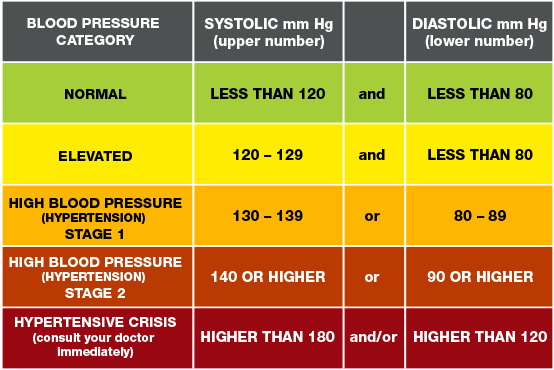

* **SkinThickness** : Triceps skin fold thickness (mm). Skin fold thickness measurement provides an estimated size of the subcutaneous fat, which is the layer of subcutaneous tissue and composed of adipocytes. Subcutaneous fat is the major determinant of insulin sensitivity and has a strong association with insulin resistance. [Cite](https://www.semanticscholar.org/paper/Skin-Fold-Thickness-in-Diabetes-Mellitus%3A-A-Simple-Selvi-Pavithra/5d68b7a7391272feb9a737f4d69539483deb2556)

* **Insulin** : 2-Hour serum insulin (mu U/ml). Insulin is a peptide hormone produced by beta cells of the pancreatic islets; it is considered to be the main anabolic hormone of the body. It regulates the metabolism of carbohydrates, fats and protein by promoting the absorption of glucose from the blood into liver, fat and skeletal muscle cells. [Cite](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjp_O2S8bHtAhVAzzgGHeJwBhAQmhMwHXoECC8QAg&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FInsulin&usg=AOvVaw1shvsn0GOvC5LJCRsIorHn)

* **BMI** : Body mass index (weight in kg/(height in m)^2)

* **DiabetesPedigreeFunction** : It provides some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. 

* **Age** : Age (years)

* **Outcome** : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
df.info()

In [ ]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome']

In [ ]:
print('No. of Missing Values:\n' + str(df.isnull().isnull().sum()))

## Distribution

In [ ]:
plt.figure(figsize = (20,16))
n = 0
for i in features + target:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.4,wspace = 0.2)
    sns.boxplot(x=df[i])
plt.show()

Outcome is Binary...

Not a very evenly distributed dataset, we have quite a lot of outliers.

# Exploratory Data Analysis

In [ ]:
print('Dataset shape before outlier rejection: ',df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df = df.reset_index().drop(['index'],axis = 1)
print('Dataset shape after outlier rejection: ',df.shape)

In [ ]:
df.value_counts()

In [ ]:
plt.figure(figsize = (20,16))
n = 0
for i in features + target:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.4,wspace = 0.2)
    sns.boxplot(x=df[i])
plt.show()

In [ ]:
sns.set(style = 'whitegrid')
sns.pairplot(df)

In [ ]:
corr = df[features].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [ ]:
corrMatrix = pd.DataFrame(df[df.columns[0:]].corr()['Outcome'][:-1])
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corrMatrix.index,y = corrMatrix['Outcome'],data = corrMatrix)
plt.title('Correlation of Outcome to other features')
plt.ylabel('Correlation with Outcome')
plt.xlabel('Features')
plt.show()

### Correlated:
* Pregnancies and Age
* Skin Thickness and Insulin
* BMI and Skin Thickness
* Blood Pressure and Age

* *High Glucose & BMI levels are most likely the reasons of Diabetes*

But no two variables are correlated enought to perform PCA

### Plotting these variables to study only members who got Diabetes

In [ ]:
plt.figure(figsize = (20,16))
n = 0
for hues_crit in ['Glucose','BMI']:
    for i,j in zip(['Pregnancies','SkinThickness','BMI','BloodPressure'],['Age','Insulin','SkinThickness','Age']):
        n += 1
        plt.subplot(4,2,n)
        plt.subplots_adjust(hspace = 0.4,wspace = 0.2)
        sns.scatterplot(x = df[i].where(df['Outcome'] == 1),y = df[j].where(df['Outcome'] == 1),hue = df[hues_crit])
plt.legend()
plt.show()

# Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()

In [ ]:
def plot_history(history,n):
    print("PLOT FOR {}".format(n))
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [ ]:
def grid_search(est,param_grid):
    fin_model = GridSearchCV(estimator=est,param_grid=param_grid,cv = 10,n_jobs = -1)
    return fin_model

In [ ]:
def neigh(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('neigh', KNeighborsClassifier())])
    param_grid = {'neigh__n_neighbors':[i for i in range(1,20)],
                 'neigh__weights':['uniform', 'distance']}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('KNN_CLASSIFIER: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [ ]:
def forest(X_train,y_train,X_test,y_test):
    #Parameter Grid
    pipe = Pipeline([('forest', RandomForestClassifier(random_state = 0))])
    param_grid = {'forest__n_estimators':[10,50,140],
                 'forest__max_depth' : [1,2,3,4],
                 'forest__max_features':['sqrt', 'log2']}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    #Evaluation Phase
    print('RANDOM FOREST: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [ ]:
def svm(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('svm', SVC(gamma = 'auto',random_state = 0))])
    param_grid = {'svm__kernel':['poly', 'rbf'],
                 'svm__degree':[1,2,3],
                 'svm__C' : [1,2,3]}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('SVM: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,target].values
# Standardizing the features
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
neigh(X_train,y_train,X_test,y_test)

In [ ]:
forest(X_train,y_train,X_test,y_test)

In [ ]:
svm(X_train,y_train,X_test,y_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.001)
xgb.fit(X_train,y_train)
#make predictions for test data
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred,zero_division = 1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Neural Nets

In [ ]:
res = pd.DataFrame(columns = ['loss','acc','lr','opt','layers','m_value','n_value','epochs','add_dropout'])
pd.set_option('max_colwidth', 400)

In [ ]:
import tensorflow as tf
from keras.layers import Dense,Dropout,BatchNormalization
from keras import Sequential
from keras.optimizers import Adam,SGD,RMSprop,Nadam,Adadelta
import gc

In [ ]:
def model(X_train,y_train,X_test,y_test,lr = 0.001,opt = Adam,layers = 3,m=10,n=100,epochs = 10,add_dropout = False):
    model = Sequential()
    model.add(Dense(units = 10, activation = 'relu',input_shape = (8,)))
    for i in range(layers):
        model.add(Dense(units = m, activation = 'relu'))
        model.add(Dense(units = n, activation = 'relu'))
        if(add_dropout == True):
            model.add(Dropout(0.2))
    model.add(Dense(units = 1,activation = 'sigmoid'))
    model.compile(optimizer = opt(lr = lr),loss = 'binary_crossentropy',metrics = ['binary_accuracy'])
    model.fit(X_train,y_train,epochs= epochs,validation_split = 0.1,verbose = 0)
    loss,acc = model.evaluate(X_test,y_test)
    return {'loss':loss,
            'acc':acc,
            'lr':lr,
            'opt':str(opt),
            'layers':(layers*2 + 2),#Excluding dropouts
            'm_value':m,
            'n_value':n,
            'epochs': epochs,
            'add_dropout': add_dropout}

# Exhaustive Hyperparameter Search

In [ ]:
#for lr in [0.005,0.001,0.0005]:
#    for opt in [RMSprop,Adam]:
#        for layers in [2,3,4]:
#            for m in [10,30,50,100]:
#                for n in [10,30,50,100]:
#                    for epochs in [5,10,20]:
#                        for add_dropout in [False,True]:
#                            res = res.append(model(X_train,y_train,X_test,y_test,lr,opt,layers,
#                                                   m,n,epochs,add_dropout),ignore_index = True)

In [ ]:
ad_f = pd.read_csv('../input/final-search-result/ad_f.csv')
ad_t = pd.read_csv('../input/final-search-result/ad_t.csv')
rms_f = pd.read_csv('../input/final-search-result/rms_f.csv')
rms_t = pd.read_csv('../input/final-search-result/rms_t.csv')
fin = ad_f
fin = fin.append([ad_t,rms_f,rms_t])
fin = fin.reset_index().drop(['index','Unnamed: 0'],axis = 1)
fin

In [ ]:
fin.where(fin['loss']<0.45).dropna()

In [ ]:
fin.where(fin['acc'] > 0.79).dropna()

# Maximum Test Accuracy achieved = 80.4348% 
# Minimum Loss = 0.446542	